In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import sqlite3
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chicago-crimes-90-days-2024/Crimes_-_One_year_prior_to_present.csv


The purpose of this data analysis is to identify the types of crime that occur the most, arrest probabilities, and where the reports are done that can indicate the likliehood of having police reports. 

# DATA REVIEW

In [54]:
chicago_crime = pd.read_csv('/kaggle/input/chicago-crimes-90-days-2024/Crimes_-_One_year_prior_to_present.csv')
chicago_crime.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JG497095,11/08/2023 08:50:00 PM,025XX N KEDZIE BLVD,0810,THEFT,OVER $500,STREET,N,N,1414,35.0,06,1154609.0,1916759.0,41.927407,-87.707294,"(41.927407329, -87.70729439)"
1,JG496991,11/08/2023 03:14:00 PM,0000X W CHICAGO AVE,0560,ASSAULT,SIMPLE,STREET,N,N,1832,42.0,08A,1176106.0,1905725.0,41.896672,-87.628635,"(41.896671699, -87.628635323)"
2,JG497145,11/08/2023 10:55:00 PM,019XX W 47TH ST,051A,ASSAULT,AGGRAVATED - HANDGUN,SIDEWALK,N,N,931,15.0,04A,1164331.0,1873509.0,41.808525,-87.672793,"(41.808525157, -87.672792896)"
3,JH179051,03/07/2024 02:15:00 PM,070XX S STATE ST,0820,THEFT,$500 AND UNDER,GROCERY FOOD STORE,Y,N,322,6.0,06,1177506.0,1858207.0,41.766247,-87.624933,"(41.766246905, -87.624932618)"
4,JH178785,03/07/2024 04:53:00 AM,077XX S CARPENTER ST,0810,THEFT,OVER $500,STREET,N,N,612,17.0,06,1170656.0,1853451.0,41.753348,-87.650179,"(41.753347902, -87.650178718)"


In [55]:
chicago_crime.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [56]:
# Making sure there's no null values to consider.
chicago_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258562 entries, 0 to 258561
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CASE#                   258562 non-null  object 
 1   DATE  OF OCCURRENCE     258562 non-null  object 
 2   BLOCK                   258562 non-null  object 
 3    IUCR                   258562 non-null  object 
 4    PRIMARY DESCRIPTION    258562 non-null  object 
 5    SECONDARY DESCRIPTION  258562 non-null  object 
 6    LOCATION DESCRIPTION   257389 non-null  object 
 7   ARREST                  258562 non-null  object 
 8   DOMESTIC                258562 non-null  object 
 9   BEAT                    258562 non-null  int64  
 10  WARD                    258560 non-null  float64
 11  FBI CD                  258562 non-null  object 
 12  X COORDINATE            258471 non-null  float64
 13  Y COORDINATE            258471 non-null  float64
 14  LATITUDE            

In [57]:
# PD - stands for primary description
PD = chicago_crime[' PRIMARY DESCRIPTION'].value_counts()
PD

 PRIMARY DESCRIPTION
THEFT                                57531
BATTERY                              44881
CRIMINAL DAMAGE                      29816
MOTOR VEHICLE THEFT                  26560
ASSAULT                              22996
OTHER OFFENSE                        15988
DECEPTIVE PRACTICE                   15396
ROBBERY                              10975
WEAPONS VIOLATION                     8415
BURGLARY                              7341
NARCOTICS                             5387
CRIMINAL TRESPASS                     4674
OFFENSE INVOLVING CHILDREN            1676
CRIMINAL SEXUAL ASSAULT               1570
SEX OFFENSE                           1314
PUBLIC PEACE VIOLATION                 875
HOMICIDE                               605
INTERFERENCE WITH PUBLIC OFFICER       589
ARSON                                  510
STALKING                               486
LIQUOR LAW VIOLATION                   194
CONCEALED CARRY LICENSE VIOLATION      194
PROSTITUTION                     

In [58]:
location = chicago_crime[' LOCATION DESCRIPTION'].value_counts()
location

 LOCATION DESCRIPTION
STREET                                    75207
APARTMENT                                 48740
RESIDENCE                                 30430
SIDEWALK                                  13435
PARKING LOT / GARAGE (NON RESIDENTIAL)     9364
                                          ...  
HOTEL                                         1
VESTIBULE                                     1
LIQUOR STORE                                  1
BEACH                                         1
CHA STAIRWELL                                 1
Name: count, Length: 130, dtype: int64

In [59]:
SD = chicago_crime[' SECONDARY DESCRIPTION'].value_counts()
SD

 SECONDARY DESCRIPTION
SIMPLE                                      30550
DOMESTIC BATTERY SIMPLE                     20074
OVER $500                                   19829
$500 AND UNDER                              19035
AUTOMOBILE                                  17952
                                            ...  
INTIMIDATION OF LAW ENFORCEMENT OFFICIAL        1
ATTEMPT - CYCLE, SCOOTER, BIKE NO VIN           1
PIMPING                                         1
ARMED VIOLENCE                                  1
PAY TV SERVICE OFFENSES                         1
Name: count, Length: 294, dtype: int64

In [60]:
arrest = chicago_crime['ARREST'].value_counts()
arrest


ARREST
N    226861
Y     31701
Name: count, dtype: int64

Viewing which wards are likely to record crime and which wards have least crime recorded.

In [61]:
ward = chicago_crime['WARD'].value_counts()
ward

WARD
27.0    11769
28.0    11392
6.0      9763
24.0     8647
20.0     8506
17.0     8222
42.0     8181
9.0      8081
4.0      8008
8.0      7998
21.0     7771
16.0     7718
7.0      7526
37.0     7080
3.0      6892
34.0     6807
5.0      5989
10.0     5474
29.0     5170
1.0      4868
49.0     4811
46.0     4471
26.0     4439
44.0     4324
25.0     4278
15.0     4262
36.0     4136
2.0      4070
18.0     3986
14.0     3770
31.0     3640
48.0     3601
32.0     3579
22.0     3453
35.0     3431
40.0     3352
11.0     3151
30.0     3109
41.0     3015
50.0     2938
33.0     2893
12.0     2866
43.0     2855
13.0     2796
45.0     2795
23.0     2744
39.0     2651
47.0     2598
19.0     2389
38.0     2295
Name: count, dtype: int64

Checking the probability of the overall arrests from all the primary/ secondary description crimes to determine if the crimes impact getting arrest or not. 

In [62]:
total = 258562
arrest_prob = 31701/total
no_arrest_prob = 226861 / total

print(arrest_prob)
print(no_arrest_prob)


0.12260502316659061
0.8773949768334094


In [63]:
chicago_crime['DATE  OF OCCURRENCE'] = pd.to_datetime(chicago_crime['DATE  OF OCCURRENCE'])
v = chicago_crime.sort_values('DATE  OF OCCURRENCE')
dups = chicago_crime.pivot_table(index = ['DATE  OF OCCURRENCE'], aggfunc ='size')
dups
# demonstrating how this would look if it was in ascending order by date. 


DATE  OF OCCURRENCE
2023-05-05 05:15:00     1
2023-05-05 05:30:00     1
2023-05-05 05:45:00     2
2023-05-05 06:00:00     4
2023-05-05 06:15:00     1
                       ..
2024-05-02 23:45:00     1
2024-05-02 23:55:00     1
2024-05-02 23:56:00     1
2024-05-02 23:57:00     1
2024-05-03 00:00:00    10
Length: 125561, dtype: int64

In [64]:
date = chicago_crime['DATE  OF OCCURRENCE'].value_counts()
max_date = date.max()
date
#max date of most police reports in one day at the same time is January 1st, 2024 leading by June 1st 2023.


DATE  OF OCCURRENCE
2024-01-01 00:00:00    78
2023-06-01 00:00:00    76
2023-10-01 00:00:00    66
2023-09-01 00:00:00    63
2023-08-01 00:00:00    61
                       ..
2023-12-21 08:47:00     1
2023-12-21 23:08:00     1
2023-12-21 11:08:00     1
2023-12-21 01:13:00     1
2023-06-27 05:02:00     1
Name: count, Length: 125561, dtype: int64

In [65]:
date = chicago_crime['DATE  OF OCCURRENCE'].value_counts()
median = date.median()
median

1.0

Determing the percent change in the median and mean of police reports on the same date at the same time compared to the max police reports recorded at the same date and time. 

In [66]:
mean = date.mean()
median_diff = pd.Series([median,max_date])
# median_diff
pt_median = median_diff.pct_change()
mean_d = pd.Series([mean,max_date])
pt_mean = mean_d.pct_change()
print(pt_median) 

print(pt_mean)

0     NaN
1    77.0
dtype: float64
0          NaN
1    36.877793
dtype: float64


In [67]:
ward_max = ward.max()
ward_mean = ward.mean()
ward_median = ward.median()
wmd_d = pd.Series([ward_median,ward_max])
pt_wmd = wmd_d.pct_change()
wm_d = pd.Series([ward_mean, ward_max])
pt_wm = wm_d.pct_change()
print("Ward median report count:",ward_median)
print('Ward mean report count:',ward_mean)
print("Median percent change:\n", pt_wmd)
print("Mean percent change:\n",pt_wm)

Ward median report count: 4270.0
Ward mean report count: 5171.2
Median percent change:
 0         NaN
1    1.756206
dtype: float64
Mean percent change:
 0         NaN
1    1.275874
dtype: float64


# VISUALIZATION

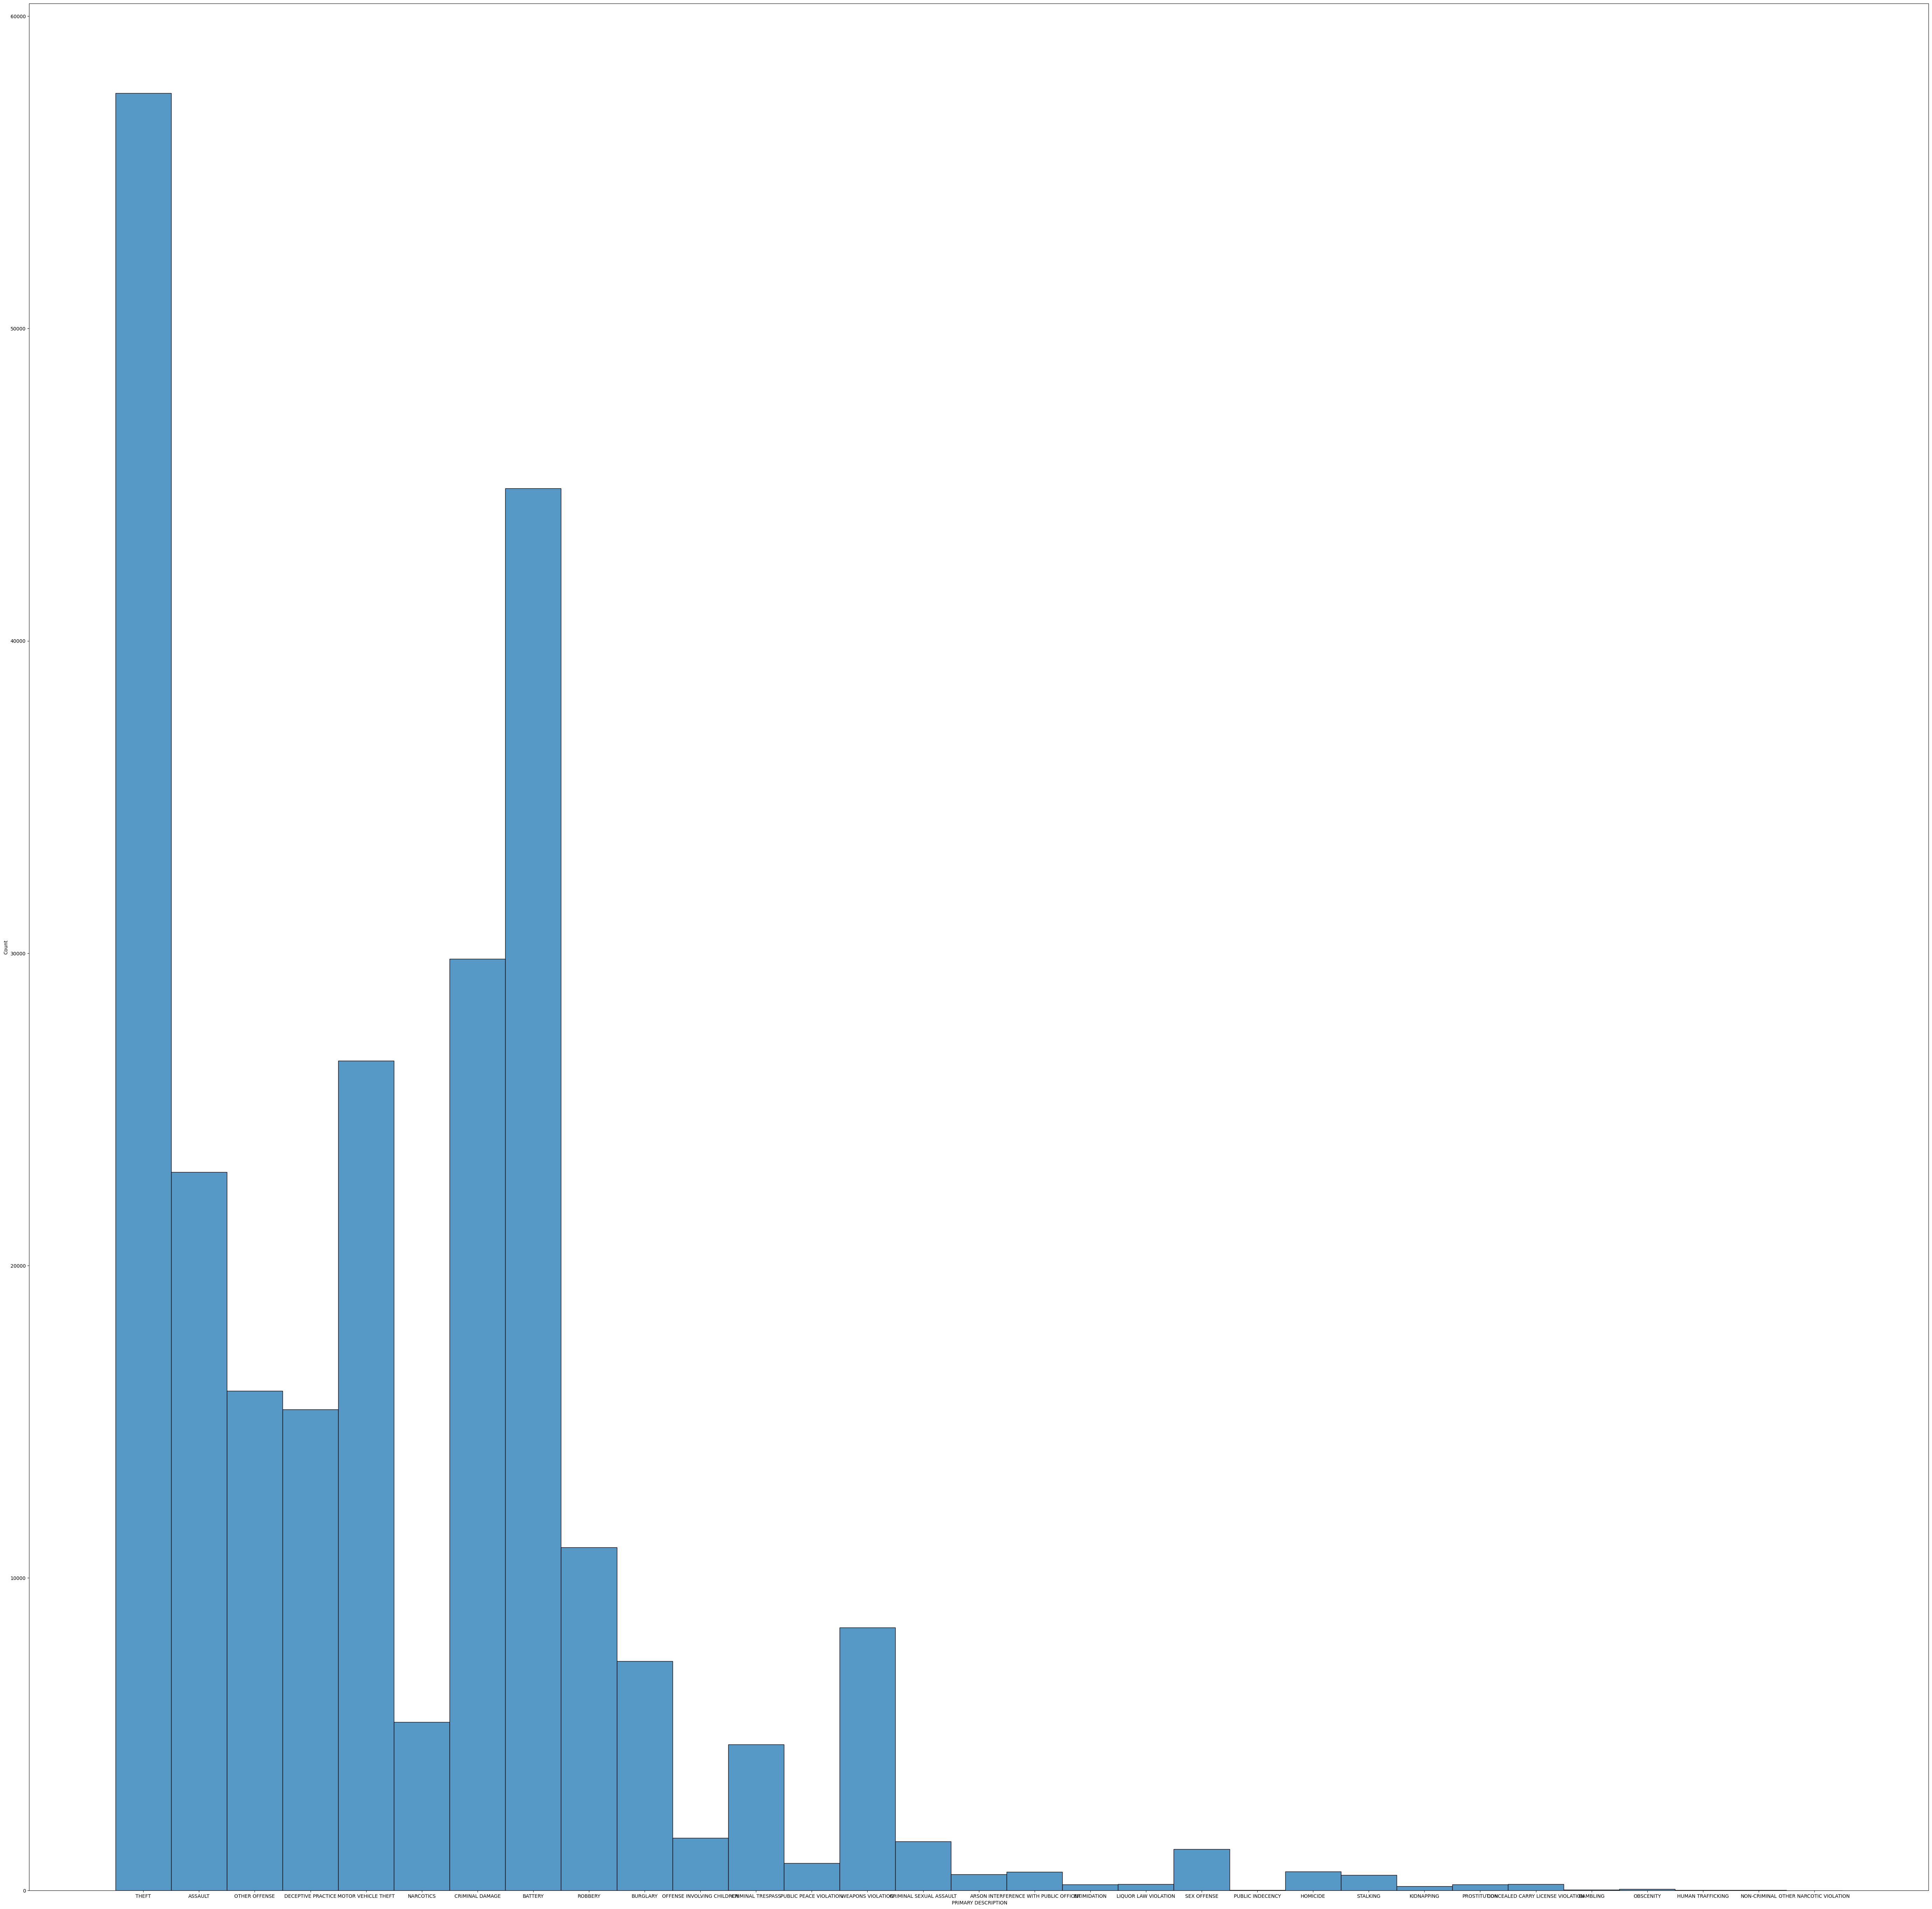

In [68]:
plt.figure(figsize = (70,70))
sns.histplot(data=chicago_crime ,x=' PRIMARY DESCRIPTION')
plt.show()

Visualization of the wards crime distribution. 


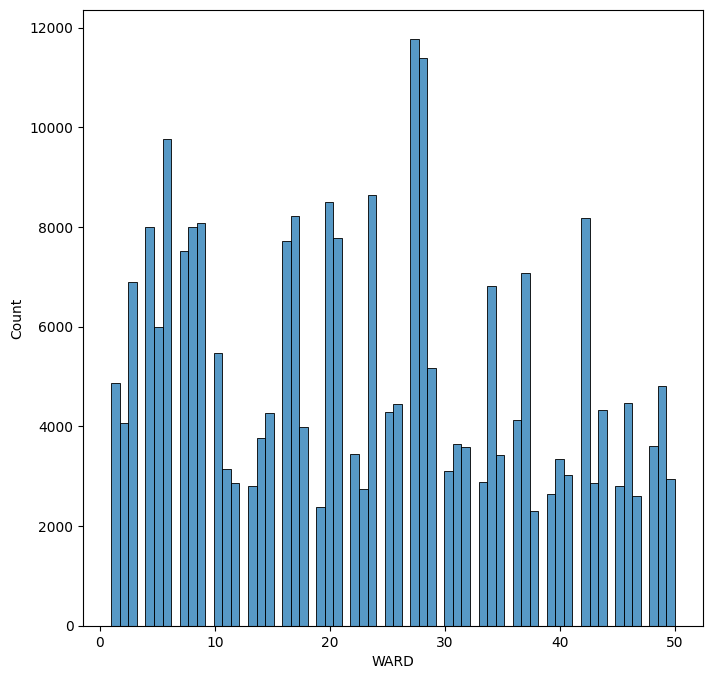

In [69]:
plt.figure(figsize = (8,8))
sns.histplot(data=chicago_crime ,x='WARD')
plt.show()

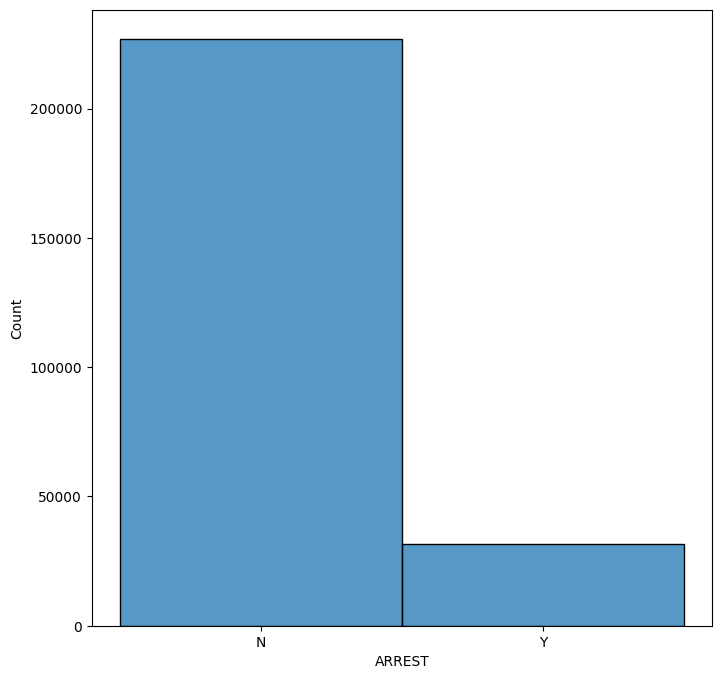

In [70]:
plt.figure(figsize = (8,8))
sns.histplot(data=chicago_crime ,x='ARREST')
plt.show()